In [7]:
#|default_exp app

In [8]:
#|export
from fastai.vision.all import *
import gradio as gr

def is_cat(x): return x[0].isupper()

/home/thomas/anaconda3/envs/huggingfacegradiotest/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


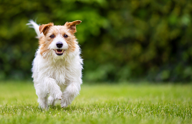

In [9]:
im = PILImage.create('dog.jpg')
im.thumbnail((192,192))
im

In [10]:
#|export
learn = load_learner('model.pkl')

In [11]:
learn.predict(im)

('False', TensorBase(0), TensorBase([9.9999e-01, 5.5343e-06]))

In [12]:
#|export
categories = ('Dog', 'Cat')

def classify_image(img):
    pred, idx, probs = learn.predict(img)
    return dict(zip(categories, map(float, probs)))


In [13]:
classify_image(im)

{'Dog': 0.9999945163726807, 'Cat': 5.534268893825356e-06}

In [14]:
#|export
image = gr.inputs.Image(shape=(192,192))
label = gr.outputs.Label()
examples = ['dog.jpg', 'cat.jpg', 'dogcat.png']

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)


/home/thomas/anaconda3/envs/huggingfacegradiotest/lib/python3.10/site-packages/gradio/inputs.py:256: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/home/thomas/anaconda3/envs/huggingfacegradiotest/lib/python3.10/site-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/home/thomas/anaconda3/envs/huggingfacegradiotest/lib/python3.10/site-packages/gradio/outputs.py:196: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/home/thomas/anaconda3/envs/huggingfacegradiotest/lib/python3.10/site-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Running on local URL:  http://127.0.0.1:7860/

To create a public link, set `share=True` in `launch()`.


(<gradio.routes.App at 0x7fe52935b010>, 'http://127.0.0.1:7860/', None)

Export

In [15]:
from nbdev import nbdev_export


In [16]:
nbdev_export()

InterpolationMissingOptionError: Bad value substitution: option 'doc_host' in section 'DEFAULT' contains an interpolation key 'user' which is not a valid option name. Raw value: 'https://%(user)s.github.io'